# Polynomial Regression on Trigonometric Function with $k$-fold Cross Validation



## Experiment 1

In this experiment, we assume an arbitrary function $f(x)$ and compute its value on 10,000 equally-spaced datapoints. We try to find out the optimal complexity of the regression model that can best estimate this function.


In [ ]:
#@title Importing Dependencies
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
np.random.seed(49)

In [ ]:
#@title Generating 10,000 points using `np.linspace` function
#generating 10k x from 20k in range (-4,4)
X_train = random.sample([round(x, 2) for x in list(np.linspace(-4, 4, 20000))], 10000)

In [ ]:
#@title Chosen Trigonometric Function: $f(x) = \sin\left(x^{2}+2\right)$

def f(x):
  return math.sin(x ** 2 + 2)

Y_train = [f(x) for x in X_train] #f(x) for values of x

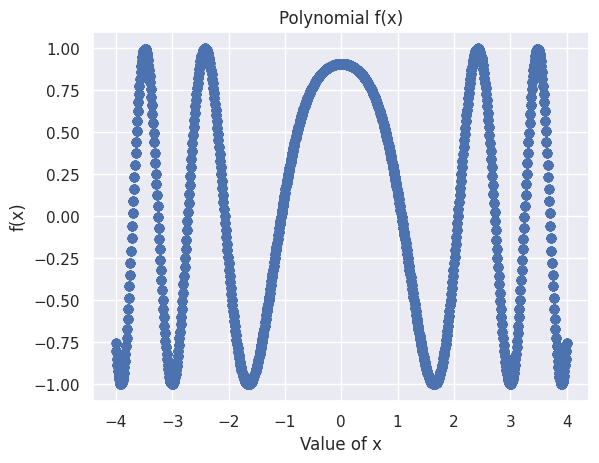

In [ ]:
#@title Visualising Dataset
df = pd.DataFrame({
    'x': X_train,
    'f(x)': Y_train
})

plt.scatter(df['x'], df['f(x)'])
plt.title('Polynomial f(x)')
plt.xlabel('Value of x')
plt.ylabel('f(x)')
plt.show()

We introduce some noise to the response variable, assuming that the noise follows Normal Distribution $\epsilon \sim N(\mu, \sigma^2)$ with zero mean and a non-zero variance ($\sigma^2 = 0.50$). The probability density function of the Normal Distribtion is given as:

$$
n(\epsilon) = \frac{1}{\sqrt{2 \pi} \sigma} \exp\bigg[- \frac{1}{2}\bigg(\frac{\epsilon - \mu}{\sigma}\bigg)^2\bigg]
$$


In [ ]:
#@title Generating Noise $\epsilon \sim N(0, \sigma^2)$

#generating (x number of )  e(x), by giving mean =0 and sd = 0.50
#not doing anything with x_train, normal distri of pts with 0, 0.5 and picking 10k from that
random_normal_error = np.random.normal(loc=0, scale=.5, size=len(X_train))

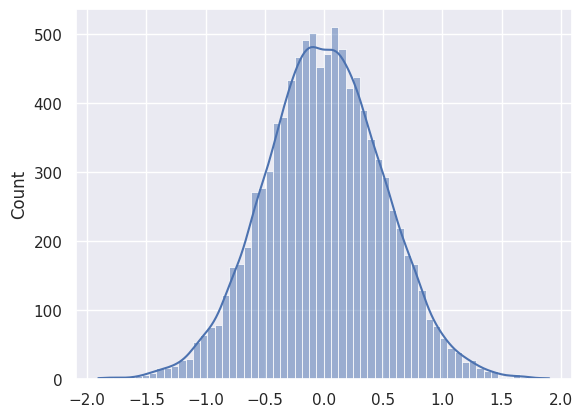

In [ ]:
#@title Visualizing Generated Noise $\epsilon$

sns.histplot(random_normal_error, kde = True)
plt.show()

We introduced the generated Gaussian noise to the function values $f(x)$ to produce noisy data.

In [ ]:
#@title
# created the dataset of 10k points, their actual f(x) values, noise and values with added noise
dataset = pd.DataFrame({
    'x': X_train,
    'f(x)': Y_train,
    'e(x)': random_normal_error,
    'f(x) + e(x)': Y_train + random_normal_error
})

dataset.head()

x      f(x)      e(x)  f(x) + e(x)
0 -0.72  0.583631 -0.521580     0.062051
1 -2.55  0.796980 -0.410428     0.386552
2  2.67  0.291580  0.332573     0.624153
3 -0.83  0.437389  0.911313     1.348702
4  3.38  0.756555 -0.720792     0.035764

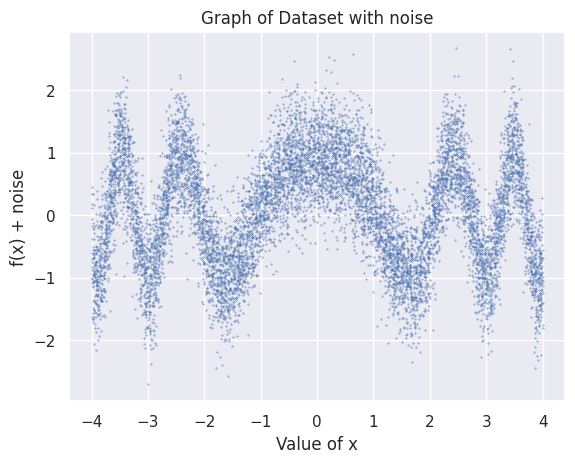

In [ ]:
#@title Visualizing Noisy Dataset

#x axis= x_train, y-axis = f(x)+e(x)
plt.scatter(dataset['x'], dataset['f(x) + e(x)'], s=.1)
plt.title('Graph of Dataset with noise')
plt.xlabel('Value of x')
plt.ylabel('f(x) + noise')
plt.show()

Now, we naively fit polynomials of order 1 through 10 sequentially, on the entire dataset to estimate the parameters $w_0, w_1,\dots, w_d$ for each polynomial. When we visualize these polynomials, they give us a sense of how the best-fit polynomial of each degree looks like when they are superimposed on the noisy dataset. This is represented in the output as follows:

Best Fit (Degree 1):
 
-0.003704 x + 0.06123


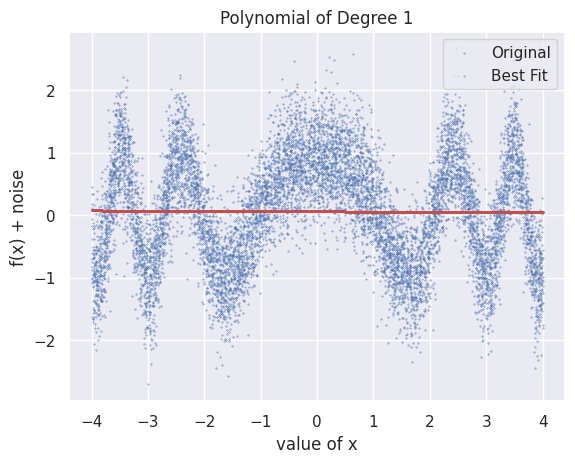





Best Fit (Degree 2):
          2
-0.03105 x - 0.003586 x + 0.2284


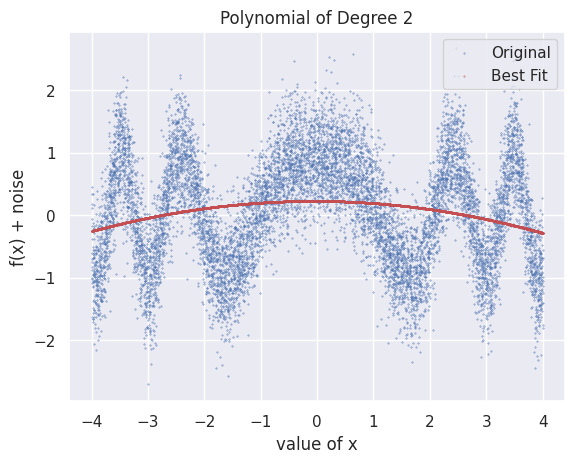





Best Fit (Degree 3):
           3           2
-0.000971 x - 0.03104 x + 0.005774 x + 0.2283


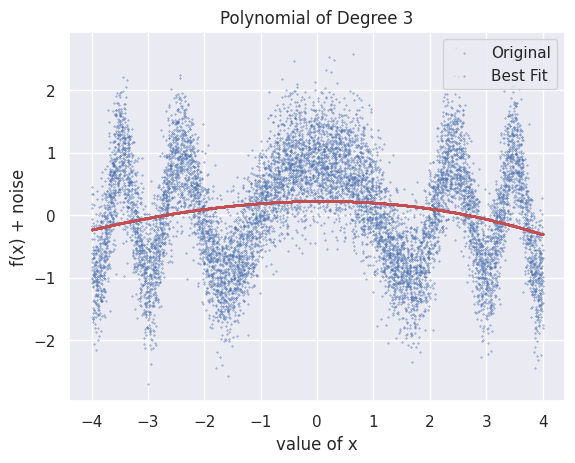





Best Fit (Degree 4):
          4            3           2
0.003558 x - 0.001011 x - 0.07993 x + 0.006063 x + 0.3068


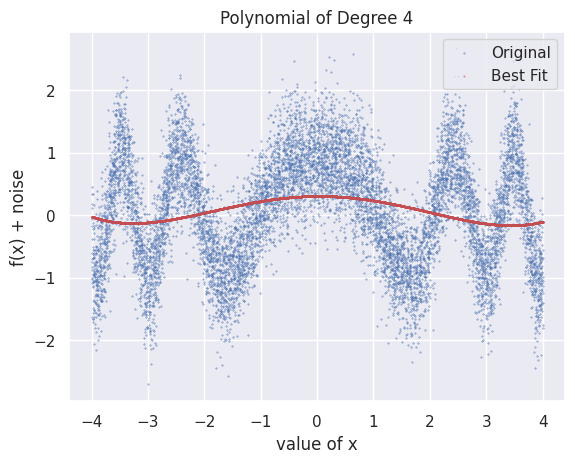





Best Fit (Degree 5):
            5            4            3           2
-0.0002755 x + 0.003568 x + 0.003895 x - 0.08006 x - 0.01083 x + 0.307


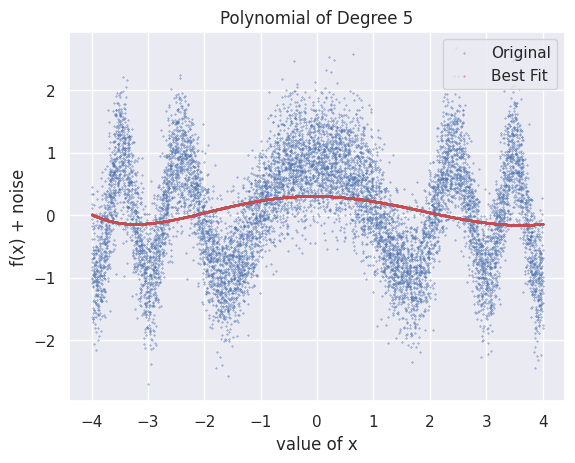





Best Fit (Degree 6):
           6             5           4            3          2
-0.004378 x - 9.269e-05 x + 0.09924 x + 0.001126 x - 0.5915 x - 0.003542 x + 0.6972


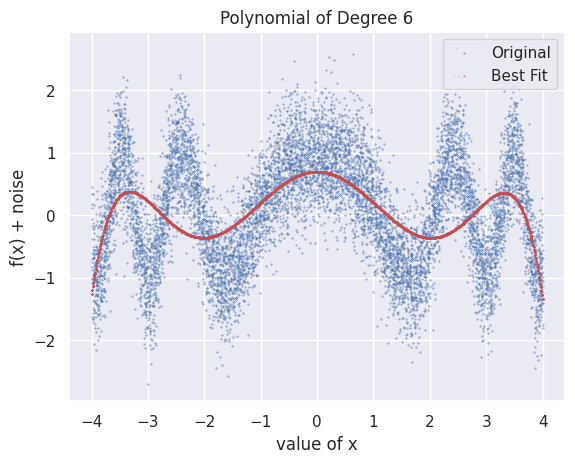





Best Fit (Degree 7):
            7            6            5           4            3
-1.668e-05 x - 0.004378 x + 0.000339 x + 0.09922 x - 0.002019 x
           2
 - 0.5915 x + 0.002062 x + 0.6971


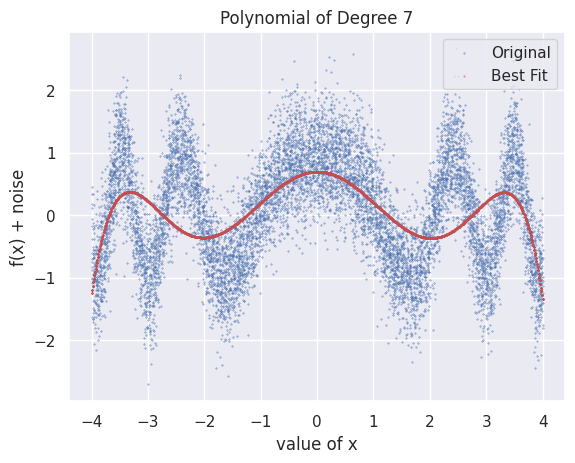





Best Fit (Degree 8):
           8             7          6            5          4
0.0003853 x - 3.232e-05 x - 0.0159 x + 0.000693 x + 0.2058 x
            3          2
 - 0.00433 x - 0.9026 x + 0.006093 x + 0.8357


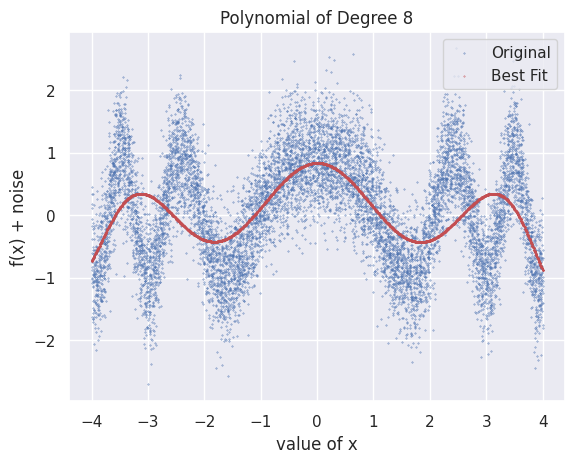





Best Fit (Degree 9):
           9             8             7          6             5
-4.21e-06 x + 0.0003854 x + 0.0001105 x - 0.0159 x - 0.0009104 x
           4            3          2
 + 0.2058 x + 0.002264 x - 0.9026 x - 0.001115 x + 0.8358


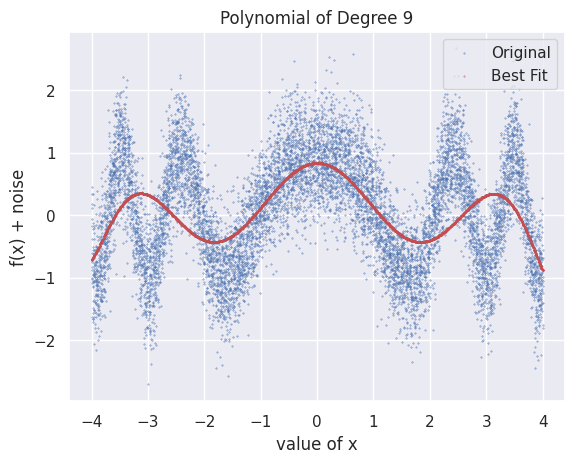





Best Fit (Degree 10):
            10             9           8             7          6
-0.0002677 x  + 6.375e-06 x + 0.01054 x - 0.0002416 x - 0.1497 x
             5          4           3        2
 + 0.003119 x + 0.9197 x - 0.01562 x - 2.22 x + 0.02325 x + 1.218


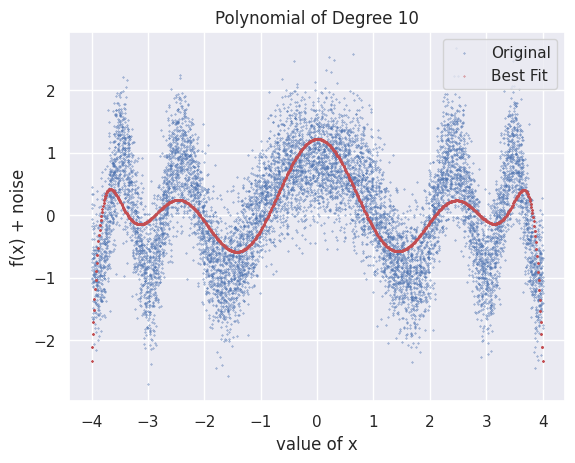

In [ ]:
#@title Fitting Polynomials without CV

# getting 10 best fits on the entire 10k dataset
degrees = range(1, 11)

for degree in degrees:
  polynomial = np.polyfit(dataset['x'], dataset['f(x) + e(x)'], degree) # getting the polynomial of best fit line for each degree
  predictions = np.polyval(polynomial, dataset['x']) # getting the values of polynomial on each value of x

  plt.scatter(dataset['x'], dataset['f(x) + e(x)'], s=.1, label='Original')
  plt.scatter(dataset['x'], predictions, color='r', s=.1, label='Best Fit')
  # plt.savefig(f'bestfit_{degree}.png')
  print(f'Best Fit (Degree {degree}):')
  print(np.poly1d(polynomial))
  plt.title(f'Polynomial of Degree {degree}')
  plt.xlabel('value of x')
  plt.ylabel('f(x) + noise')
  plt.legend(loc='upper right')
  plt.show()
  print("\n\n\n")

We now have to evaluate the complexity of the polynomial which best estimates our function. To do this, we apply $k$-fold cross validation. Applying $k$-fold cross validation, with $k$ = 10 produces 10 train-test splits from the shuffled dataset of sizes 9000:1000 in each fold. In each fold we fit polynomials of order 1 - 10 on the training set to estimate the parameters $\theta$ to find the coefficients for the best-fit polynomial.

We calculate the following error measures for each model in each fold:
*   MSE (Mean Squared Error)
$$
MSE(\theta | X) = \frac{1}{N} \sum_{t=1}^N [r^t - g(x^t | \theta)]^2
$$
*   SE (Squared Error)
$$
SE(\theta | X) = \frac{1}{2} \sum_{t=1}^N [r^t - g(x^t | \theta)]^2
$$
*   RSE (Relative Squared Error)
$$
RSE(\theta | X) = \frac{\sum_{t=1}^N [r^t - g(x^t | \theta)]^2}{\sum_{t=1}^N [r^t - \bar{r}]^2}
$$
*   AbsE (Absolute Error)
$$
AbsE(\theta | X) = \sum_{t} |r^t - g(x^t | \theta)|
$$

Apart from the error measures, we also calculate the bias and variance in each fold as follows:

$$
Bias^2(g) = \frac{1}{N} \sum_{t} [\bar{g}(x^t) - f(x^t)]^2
$$

$$
Var(g) = \frac{1}{NM} \sum_{t} \sum_{i} [\bar{g}(x^t) - g_i(x^t)]^2
$$

$$
\bar{g}(x) = \frac{1}{M} \sum_t g_i(x)
$$

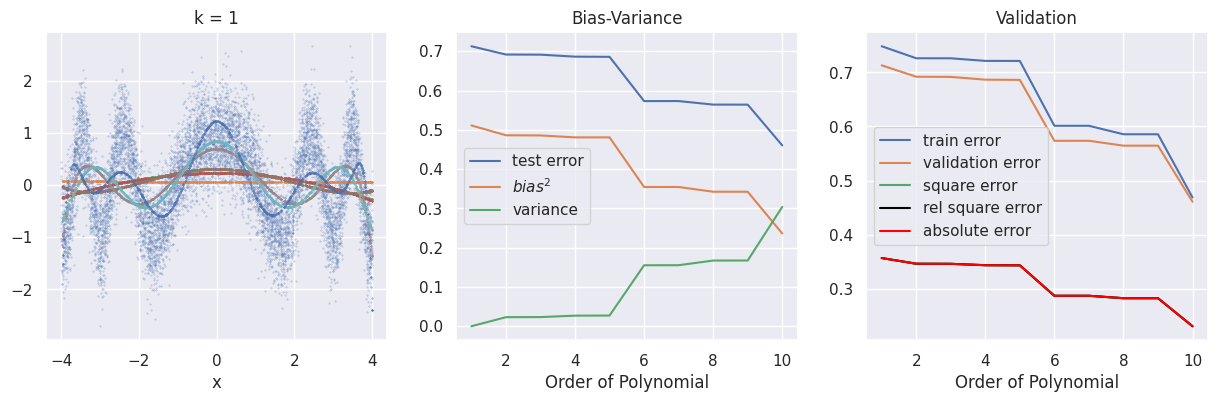

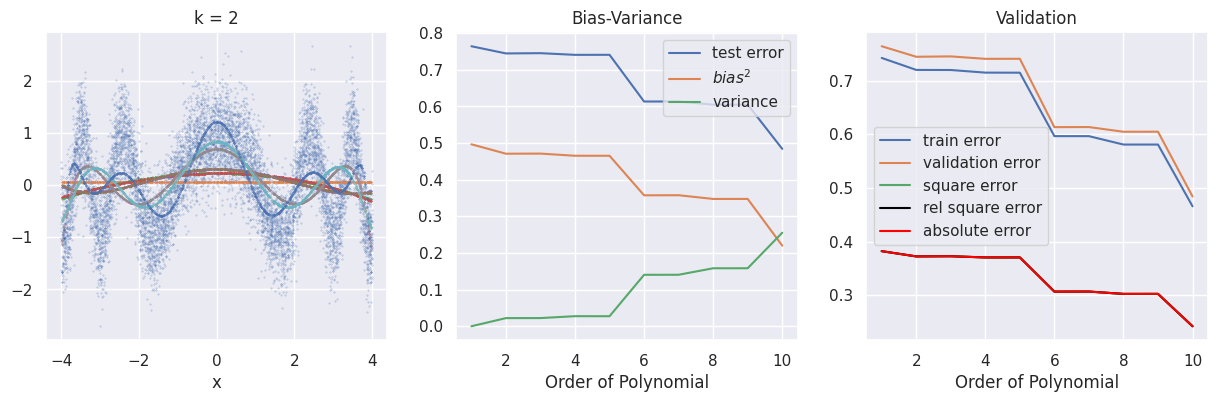

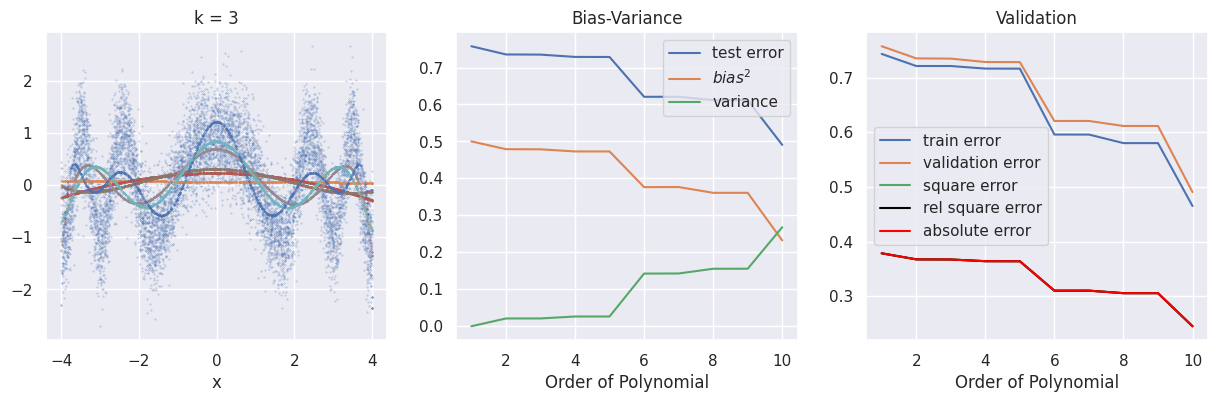

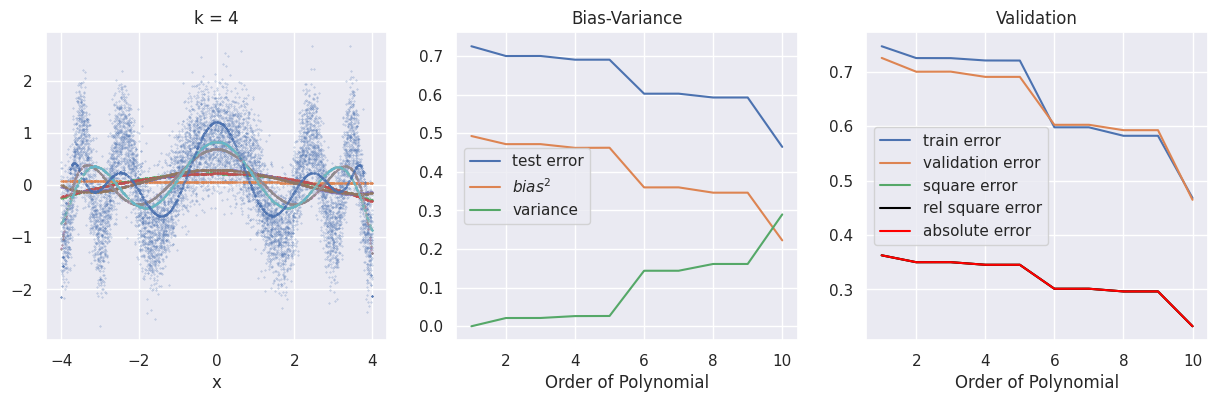

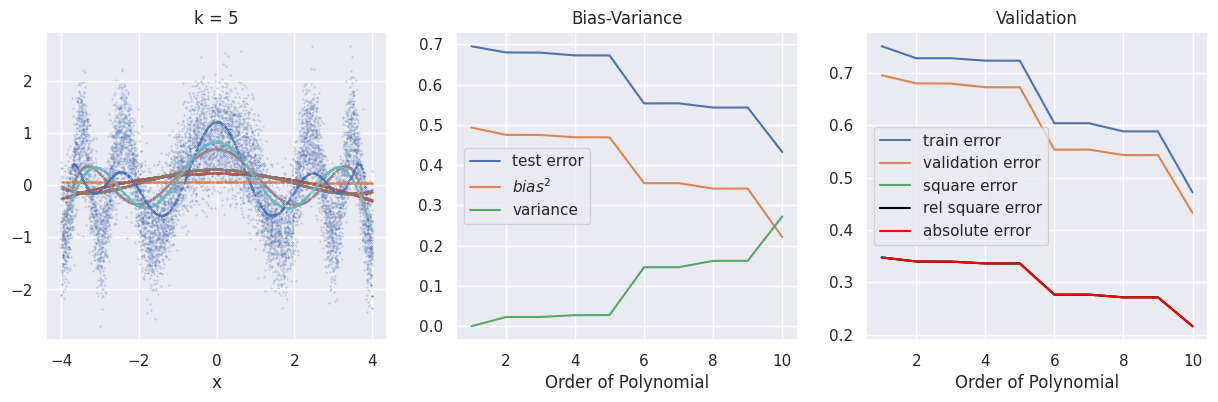

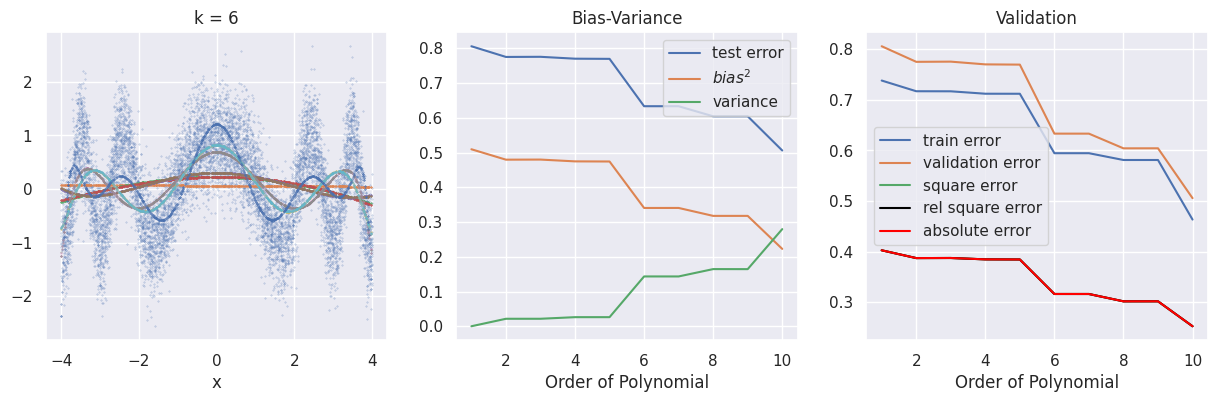

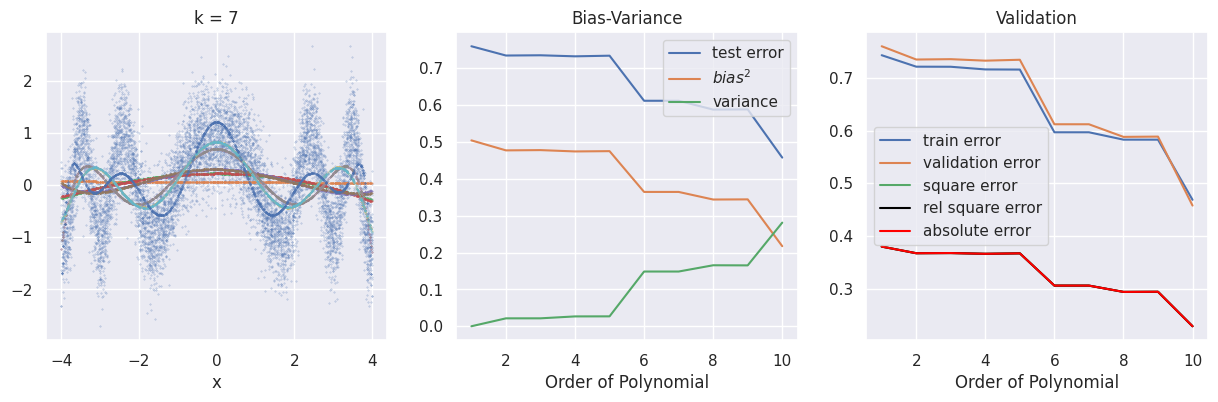

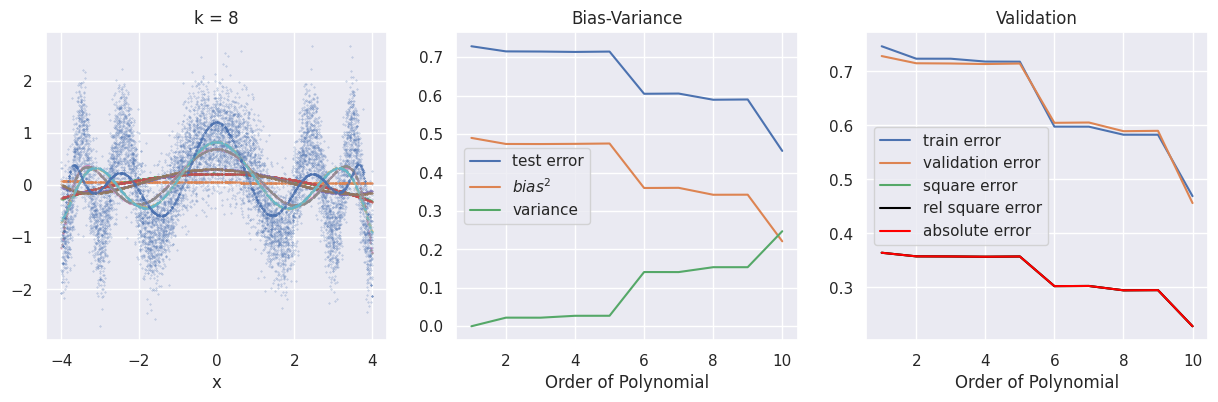

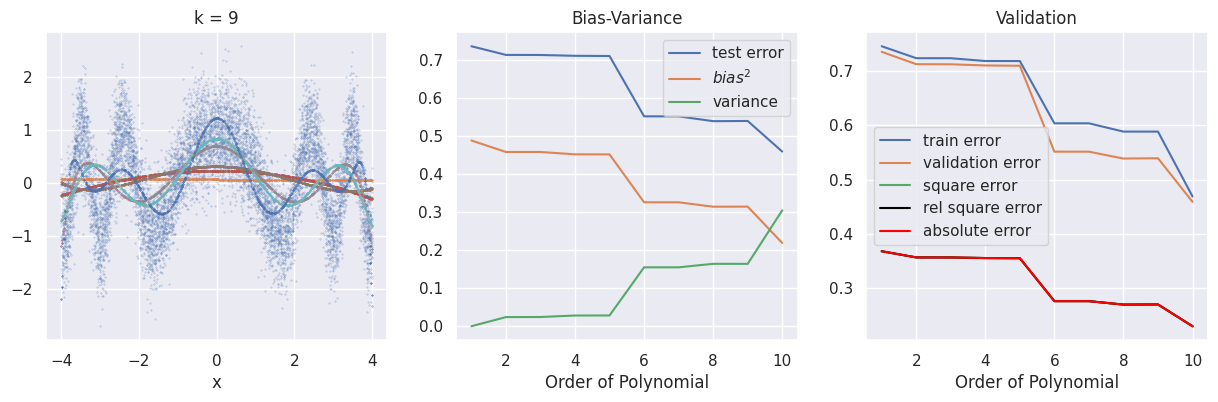

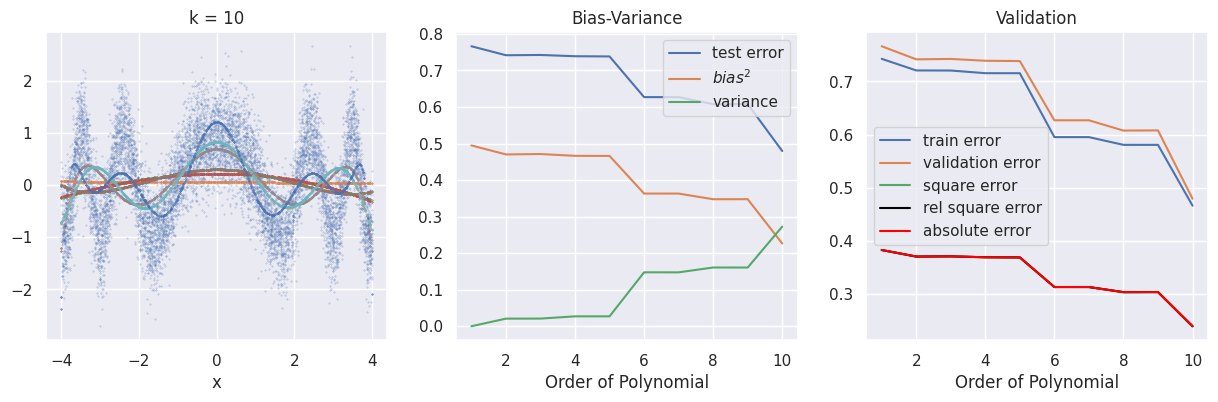

In [ ]:
#@title Applying $k$-fold CV and Fitting Polynomials

from collections import defaultdict
from sklearn.model_selection import KFold

ctr = 1

global_train_errors = []
global_test_errors = []
global_square_errors = []
global_relative_square_errors = []
global_absolute_errors= []
global_biases_sq = []
global_variances = []

kf = KFold(n_splits=10, shuffle=True, random_state=51)

# get 10 splits of the dataset
# for each split, getting the best fit for each degree
for train_index, test_index in kf.split(dataset['x'], dataset['f(x) + e(x)']):
  train_errors = defaultdict(list)
  test_errors = defaultdict(list)
  test_square_errors = defaultdict(list)
  test_relative_square_errors = defaultdict(list)
  test_absolute_errors = defaultdict(list)
  pred_test = defaultdict(list)

  training_set = dataset['x'].iloc[train_index] # 9000 X's
  training_set_y = dataset['f(x) + e(x)'].iloc[train_index] # 9000 Y's

  test_set = dataset['x'].iloc[test_index] # 1000 X's
  test_set_y = dataset['f(x) + e(x)'].iloc[test_index] # 1000 Y's

  # declare matplotlib canvas
  fig = plt.figure(figsize=(15, 4))
  ax1 = fig.add_subplot(131)
  ax2 = fig.add_subplot(132)
  ax3 = fig.add_subplot(133)

  # plot data with noise
  ax1.scatter(training_set, training_set_y, s=.1, label='Original', alpha=.5)

  for degree in degrees:
    # get best fit of each degree for the training set
    polynomial = np.polyfit(training_set, training_set_y, degree)

    # get the values of best fit for the training and test sets
    _predictions_train = np.polyval(polynomial, training_set)
    _predictions_test = np.polyval(polynomial, test_set)

    # store the predictions for computing avg prediction later
    pred_test[degree].append(_predictions_test)

    # calculate MSE for each split for each degree
    train_mse = np.mean((_predictions_train - training_set_y) ** 2)
    test_mse = np.mean((_predictions_test - test_set_y) ** 2)

    train_errors[degree].append(train_mse)
    test_errors[degree].append(test_mse)

    test_se = ((test_set_y - _predictions_test) ** 2) / 2
    test_rse = ((test_set_y - _predictions_test) ** 2) / (((test_set_y - np.mean(test_set_y)) ** 2))
    test_abse = np.abs(test_set_y - _predictions_test)

    test_square_errors[degree].append(test_se)
    test_relative_square_errors[degree].append(test_se)
    test_absolute_errors[degree].append(test_abse)

    # visualize the best fit of each degree
    ax1.scatter(test_set, _predictions_test, s=.1, label='Best Fit')

    # print(f'Best Fit (Degree {degree}):')
    # print(np.poly1d(polynomial))
    # print("\n\n")

    ax1.set_title(f'k = {ctr}')
    ax1.set_xlabel('x')

  # computation of mse, bias, variance, etc
  complexity_train_error = []
  complexity_test_error = []
  complexity_test_se = []
  complexity_test_rse = []
  complexity_test_abse = []
  bias_squared = []
  variance = []

  for degree in degrees:
    # 1s, 1d = > mean
    complexity_train_error.append(np.mean(train_errors[degree])) # take mean of training errors for each degree in this split
    complexity_test_error.append(np.mean(test_errors[degree])) # take mean of testing errors for each degree in this split

    # bias = mean((average prediction - actual)**2) for each degree in this split
    # calculate average prediction for each degree in this split
    bias_squared.append(np.mean((np.mean(pred_test[degree], axis=0) \
                                 - dataset['f(x)'].iloc[test_index]) ** 2))

    # variance = mean((average prediction - prediction) ** 2)
    variance.append(np.mean((np.mean(pred_test[degree]) - pred_test[degree]) ** 2)) # calculate for each degree in this split

    complexity_test_se.append(np.mean(test_square_errors[degree]))
    complexity_test_rse.append(np.mean(test_relative_square_errors[degree]))
    complexity_test_abse.append(np.mean(test_absolute_errors[degree]))

  ax2.set_title('Bias-Variance')
  ax2.plot(degrees, complexity_test_error, label='test error')
  ax2.plot(degrees, bias_squared, label='$bias^2$')
  ax2.plot(degrees, variance, label='variance')
  ax2.set_xlabel('Order of Polynomial')
  ax2.legend()

  ax3.set_title('Validation')
  ax3.plot(degrees, complexity_train_error, label='train error')
  ax3.plot(degrees, complexity_test_error, label='validation error')
  ax3.plot(degrees, complexity_test_se, label='square error')
  ax3.plot(degrees, complexity_test_rse, 'black', label='rel square error')
  ax3.plot(degrees, complexity_test_se, 'red', label='absolute error')
  ax3.set_xlabel('Order of Polynomial')
  ax3.legend()

  plt.show()

  ctr += 1
  global_train_errors.append(complexity_train_error)
  global_test_errors.append(complexity_test_error)
  global_biases_sq.append(bias_squared)
  global_variances.append(variance)
  global_square_errors.append(complexity_test_se)
  global_relative_square_errors.append(complexity_test_rse)
  global_absolute_errors.append(complexity_test_abse)

  print("\n\n\n")

Finally, we visualize the trend of error measures, bias, variance over all trials (or folds) by taking mean of all trials for each degree. We also observe the training v/s validation error averaged over all trials for each degree.

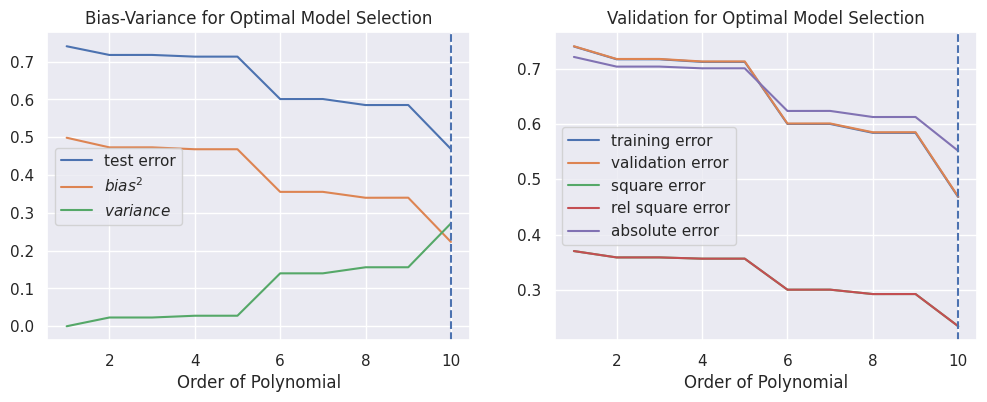

In [ ]:
#@title Analyzing Results from $k$-fold CV to select optimal model

# row = k=1, k=2, ...  k=10 ; col = order of polynomial
# column sum (axis = 0) ie taking the mean of each order for all splits

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(degrees, np.mean(global_test_errors, axis=0), label='test error')
ax1.plot(degrees, np.mean(global_biases_sq, axis=0), label='$bias^2$')
ax1.plot(degrees, np.mean(global_variances, axis=0), label='$variance$')
ax1.axvline(np.argmin(np.mean(global_test_errors, axis=0)) + 1, linestyle='--')
ax1.set_xlabel('Order of Polynomial')
ax1.set_title('Bias-Variance for Optimal Model Selection')
ax1.legend(loc='best')

ax2.plot(degrees, np.mean(global_train_errors, axis=0), label='training error')
ax2.plot(degrees, np.mean(global_test_errors, axis=0), label='validation error')
ax2.plot(degrees, np.mean(global_square_errors, axis=0), label='square error')
ax2.plot(degrees, np.mean(global_relative_square_errors, axis=0), label='rel square error')
ax2.plot(degrees, np.mean(global_absolute_errors, axis=0), label='absolute error')
ax2.axvline(np.argmin(np.mean(global_test_errors, axis=0)) + 1, linestyle='--')
ax2.set_xlabel('Order of Polynomial')
ax2.set_title('Validation for Optimal Model Selection')
ax2.legend(loc='best')

plt.show()

# TODO: other errors

### Observation

Variance increases with increasing order of polynomial - this is because the performance of overfit models vary widely depending on the training set. The bias decreases with increasing model complexity as estimates from more complex models resemble the actual datapoints more closely.

### Conclusion

We observe that the test error is minimum for degree 10 polynomials. We also see that we have the best bias-variance trade off for degree 10 polynomial only. Also the other errors are minimum for polynomials this degree.

Hence, we choose polynomial estimator of order 10 as the optimal model.

## Experiment 2

In this experiment, we consider $M$ samples of varying sizes (using `pd.DataFrame.sample`) and train our optimal model on them. For each such sample, we apply $k$-fold CV ($k$=10) to evaluate the model.

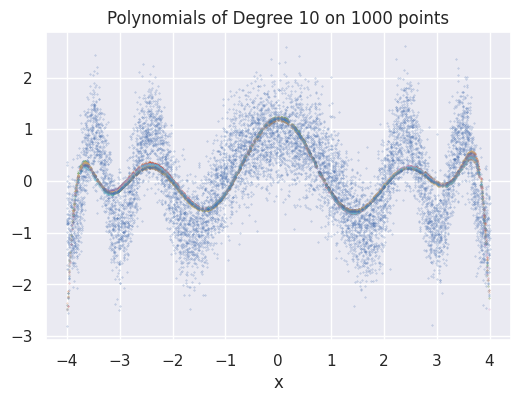

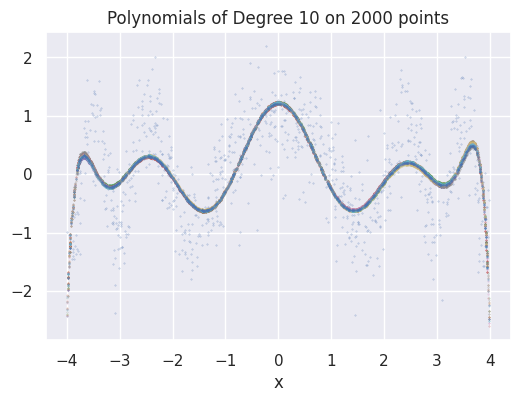

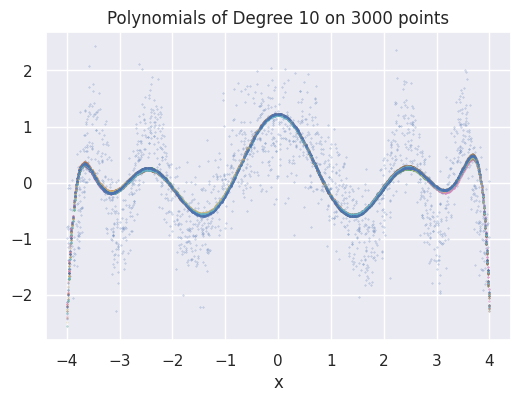

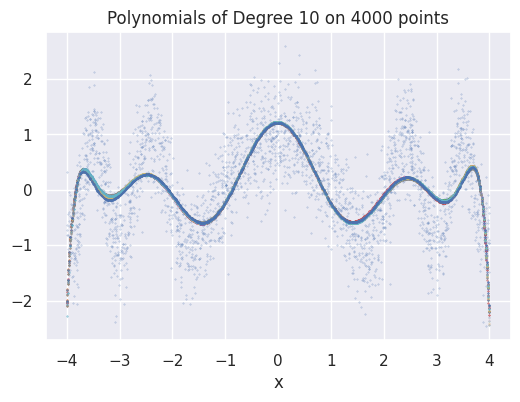

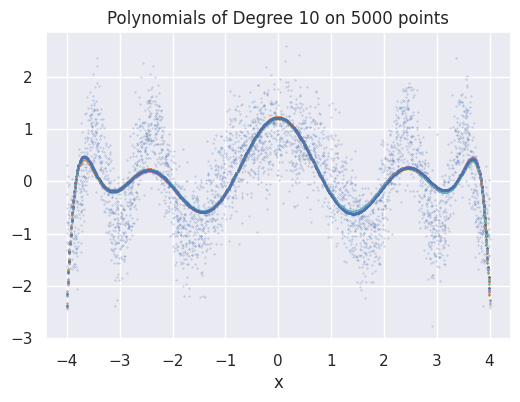

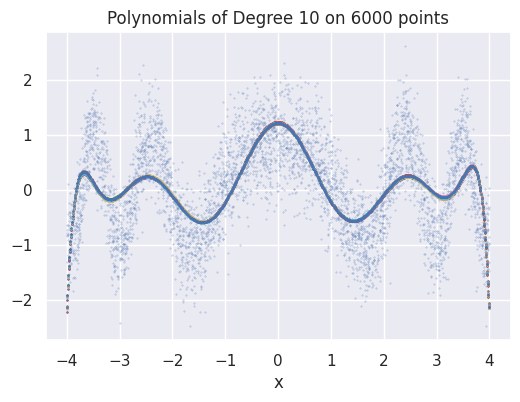

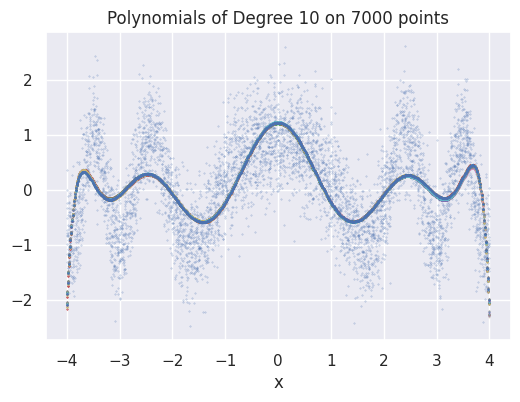

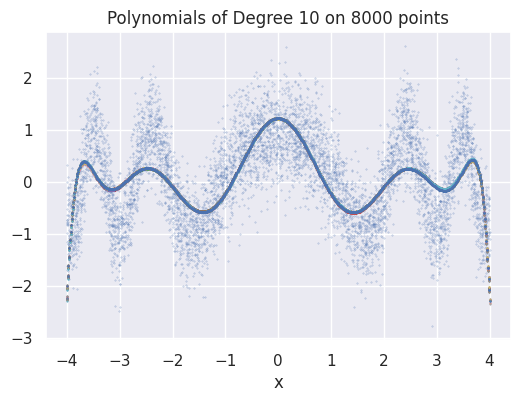

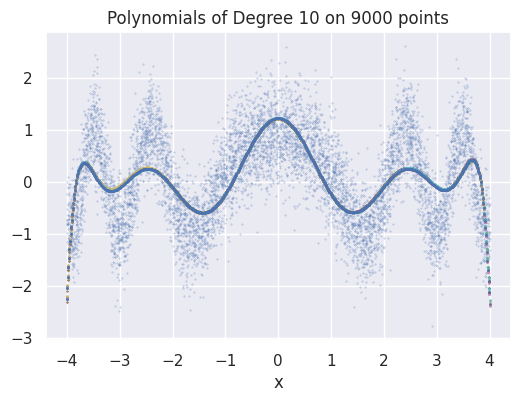

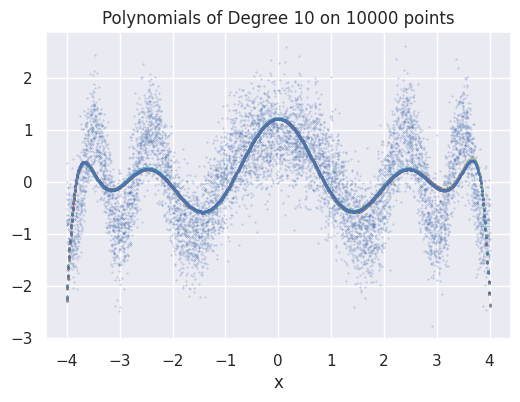

In [ ]:
#@title Applying $k$-fold CV with Different Sample Sizes

from collections import defaultdict
from sklearn.model_selection import KFold

d_sizes = range(1, 11)

global_train_errors = []
global_test_errors = []
global_square_errors = []
global_relative_square_errors = []
global_absolute_errors= []
global_biases_sq = []
global_variances = []

kf = KFold(n_splits=10, shuffle=True, random_state=51)

# get 10 splits of the dataset
# for each split, getting the best fit for each degree
for d_size in d_sizes:
  d = dataset.sample(d_size * 1000)

  pred_test = []
  train_errors = defaultdict(list)
  test_errors = defaultdict(list)
  test_square_errors = defaultdict(list)
  test_relative_square_errors = defaultdict(list)
  test_absolute_errors = defaultdict(list)
  fig = plt.figure(figsize=(6, 4))
  ax1 = fig.add_subplot(111)

  ax1.scatter(training_set, training_set_y, s=.1, label='Original', alpha=.5)

  for train_index, test_index in kf.split(d['x'], d['f(x) + e(x)']):
    training_set = d['x'].iloc[train_index]
    training_set_y = d['f(x) + e(x)'].iloc[train_index]

    test_set = d['x'].iloc[test_index]
    test_set_y = d['f(x) + e(x)'].iloc[test_index]

    polynomial = np.polyfit(training_set, training_set_y, 10)

    # get the values for the selected training set and test set size
    _predictions_train = np.polyval(polynomial, training_set)
    _predictions_test = np.polyval(polynomial, test_set)

    ax1.scatter(training_set, _predictions_train, s=.1, alpha=.5)

    pred_test.append(_predictions_test) # we have size on rows and k-folds on columns

    # 1 size -> 1 fold

    # calculate MSE for each split for each size
    train_mse = np.mean((_predictions_train - training_set_y) ** 2)
    test_mse = np.mean((_predictions_test - test_set_y) ** 2)

    test_se = ((test_set_y - _predictions_test) ** 2) / 2
    test_rse = ((test_set_y - _predictions_test) ** 2) / (((test_set_y - np.mean(test_set_y)) ** 2))
    test_abse = np.abs(test_set_y - _predictions_test)

    train_errors[d_size].append(train_mse) # we have size on rows and k-folds on columns
    test_errors[d_size].append(test_mse) # we have size on rows and k-folds on columns

    test_square_errors[d_size].append(test_se)
    test_relative_square_errors[d_size].append(test_se)
    test_absolute_errors[d_size].append(test_abse)

  # calculate errors across trials
  size_train_error = np.mean(train_errors[d_size]) # taking row mean
  size_test_error = np.mean(test_errors[d_size])
  size_test_se = np.mean(test_square_errors[d_size])
  size_test_rse = np.mean(test_relative_square_errors[d_size])
  size_test_abse = np.mean(test_absolute_errors[d_size])

  # calculate bias and variance
  bias_squared = np.mean((np.mean(pred_test) \
                              - dataset['f(x)'].iloc[test_index]) ** 2)
  variance = np.mean((np.mean(pred_test) - pred_test) ** 2)

  plt.title(f'Polynomials of Degree 10 on {d_size * 1000} points') # 10 polynomials of order 10 wrt folds
  plt.xlabel('x')
  plt.show()

  ctr += 1
  global_train_errors.append(size_train_error)
  global_test_errors.append(size_test_error)
  global_biases_sq.append(bias_squared)
  global_variances.append(variance)
  global_square_errors.append(size_test_se)
  global_relative_square_errors.append(size_test_rse)
  global_absolute_errors.append(size_test_abse)

We observe the error measures, bias, variance for each such sample and visualize their behaviour. We also observe how training and validation error vary with the size of dataset.

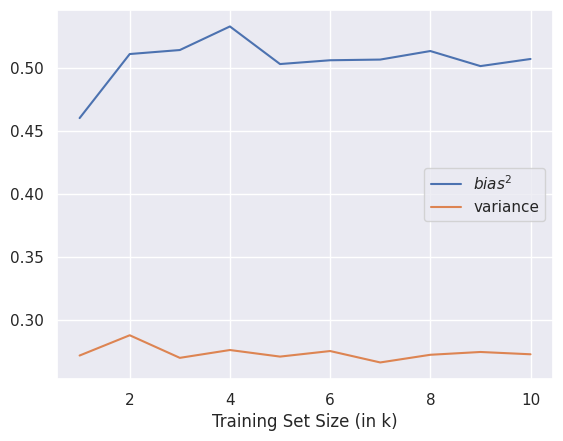

In [ ]:
#@title Analyzing Bias-Variance for Different Sample Sizes

# row = 1000,2000,3000 ------ 10000; col = k=1, k=2, ...  k=10
# row sum (axis = 1 )
plt.plot(d_sizes, global_biases_sq, label='$bias^2$')
plt.plot(d_sizes, global_variances, label='variance')

plt.xlabel('Training Set Size (in k)')
plt.legend(loc='best')
# plt.ylim([0,.3])
# plt.ylabel('MSE (validation error)')
# plt.title('Estimating Validation Error')
plt.show()

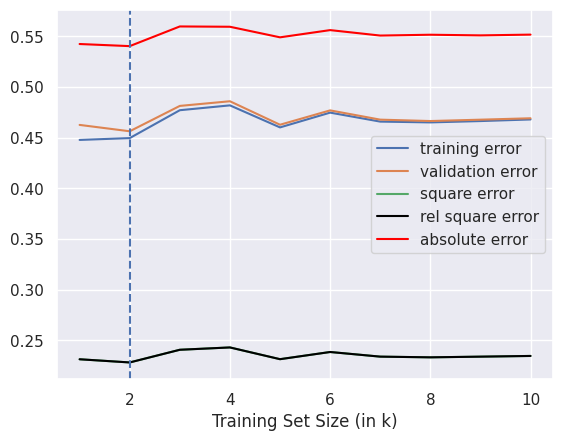

In [ ]:
#@title Analyzing Error with Different Sample Sizes

# row = 1000,2000,3000 ------ 10000; col = k=1, k=2, ...  k=10
# row sum (axis = 1 )
plt.plot(d_sizes, global_train_errors, label='training error')
plt.plot(d_sizes, global_test_errors, label='validation error')
plt.plot(degrees, global_square_errors, label='square error')
plt.plot(degrees, global_relative_square_errors, 'black', label='rel square error')
plt.plot(degrees, global_absolute_errors, 'red', label='absolute error')
plt.axvline(np.argmin(global_test_errors) + 1, linestyle='--')
plt.xlabel('Training Set Size (in k)')
plt.legend(loc='best')
# plt.ylim([0,.3])
# plt.ylabel('MSE (validation error)')
# plt.title('Estimating Validation Error')
plt.show()

### Observation

As the sample size increases, the variability of the model decreases. This generalization, howerver, is not true for bias.

### Conclusion

For our selected function $f(x) = sin(x^2 + 2)$, polynomials of order 10 trained with 2,000 instances are the best estimators.